In [2]:
# データ加工、処理、分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

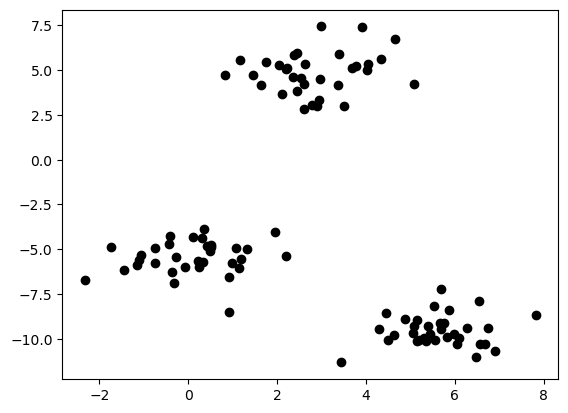

In [3]:
# k_means法を使うためのインポート
from sklearn.cluster import KMeans

#データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意: make_blobsは2つの値を返すため、１方は使用しない[_]で受け取る
X, _ = make_blobs(random_state =10)

# グラフを描画
#colorのオプションで色付けができる
plt.scatter(X[:,0], X[:,1],color='black')


In [4]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


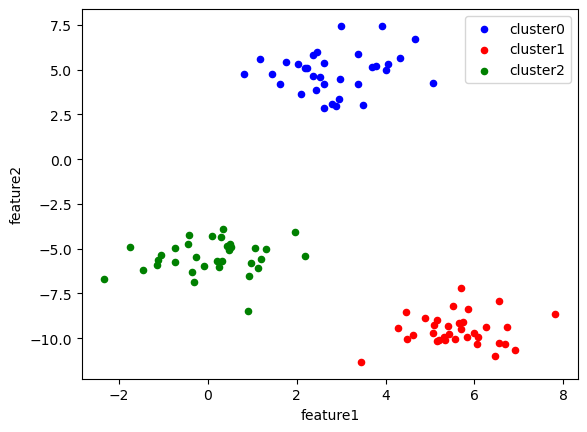

In [5]:
#concatでデータを横に結合(axis=1を指定)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1, Y軸feature2, クラスター番号をclusterと列名指定
merge_data.columns = ['feature1','feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x = 'feature1', y='feature2', color=colors[i],label=f'cluster{i}',ax=ax)

In [6]:
import requests, zipfile
import io

# データがあるurlの指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


In [7]:
ls

 ドライブ C のボリューム ラベルは TIH0551600A です
 ボリューム シリアル番号は 820A-5C9D です

 C:\Users\User\DataScience のディレクトリ

2024/10/14  12:23    <DIR>          .
2024/10/10  13:33    <DIR>          ..
2024/10/11  19:54    <DIR>          .ipynb_checkpoints
2024/10/14  13:07           461,474 bank.csv
2024/10/14  13:07         4,610,348 bank-full.csv
2024/10/14  13:07             3,864 bank-names.txt
2024/10/06  16:30    <DIR>          Chap7
2024/10/14  11:14    <DIR>          Chap9
2024/09/23  18:07            23,190 Chapter1.ipynb
2024/09/25  14:47           434,481 Chapter2.ipynb
2024/09/26  11:10    <DIR>          Chapter3
2024/09/26  16:50           321,258 Chapter3.ipynb
2024/09/30  12:58           338,049 Chapter4.ipynb
2024/10/03  15:40           221,608 Chapter5.ipynb
2024/10/04  17:41           157,029 Chapter6.ipynb
2024/10/05  21:39           309,335 Chapter7
2024/10/08  16:18         4,823,728 Chapter7-2.ipynb
2024/10/11  19:53            82,303 Chapter8.ipynb
2024/10/14  12:23           723,871 Ch

In [8]:
bank = pd.read_csv('bank-full.csv', sep = ';')

# 先頭の5行を表示
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
print('データ形式(X, y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データ形式(X, y):(45211, 17)
欠損データの数:0


In [10]:
from sklearn.preprocessing import StandardScaler

# データ列の絞り込み
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


cluster_number
0    23791
1     1374
2     3781
3     1286
4    14454
5      525
Name: count, dtype: int64


Text(0, 0.5, 'count')

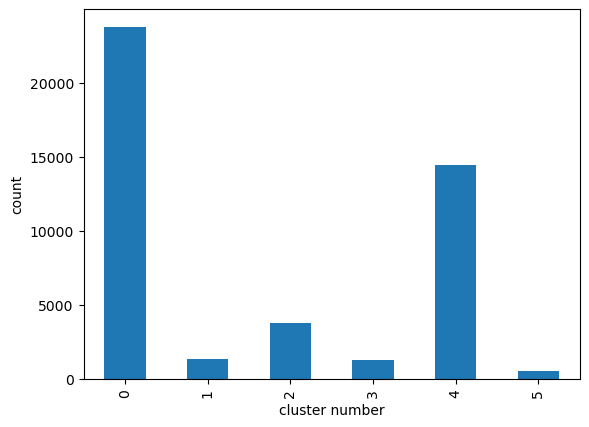

In [11]:
# KMeansクラスの初期化
kmeans = KMeans(init='random',n_clusters=6,random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name = 'cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False).sort_index())

# グラフを描写
ax = labels.value_counts(sort=False).sort_index().plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'Distortion')

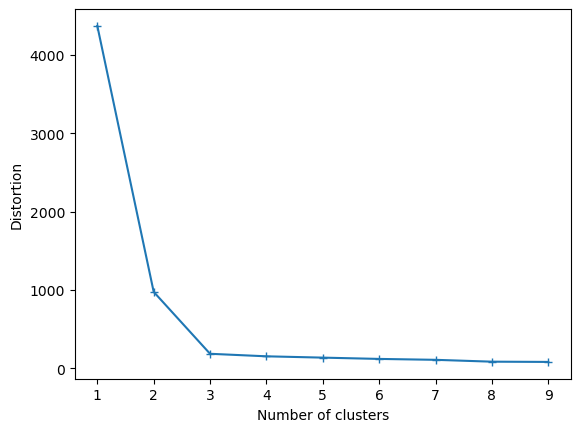

In [12]:
# エルボー法による推定。クラスター数を1から10に増やして,それぞれの距離の総和を求める
dist_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random',random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1, 10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

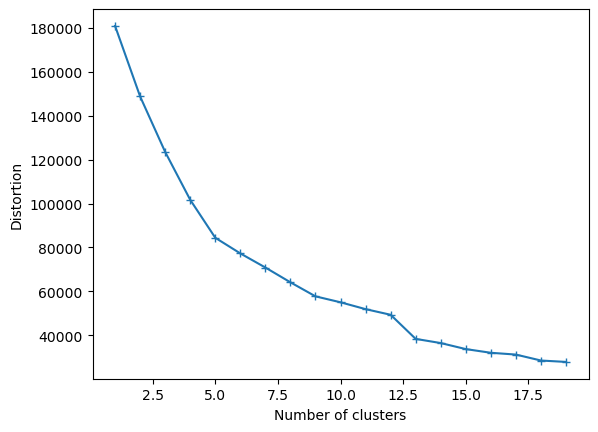

In [13]:
# エルボー法による推定。クラスター数を1から20に増やして、それぞれの距離の総和を求める
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='random',random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
# グラフを表示
plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [14]:
bank_with_cluster = pd.concat([bank, labels], axis=1)

bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [15]:
# 分割のための区切りを設定
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# クラスター番号と年齢層を結合
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# クラスター番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_age = df.groupby(['cluster_number', 'age'], observed = False).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,708,3972,8272,6853,3941,0,0,0,0,0
1,0,20,130,327,306,186,145,117,71,38,34
2,1,18,233,782,872,739,587,337,175,32,5
3,0,11,74,240,219,205,156,141,156,48,36
4,0,0,0,0,0,1022,4529,3840,3479,850,734
5,1,5,55,119,99,92,53,53,41,6,1


In [16]:
hist_age = qcut_age.value_counts()
hist_age

age
[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='cluster_number'>

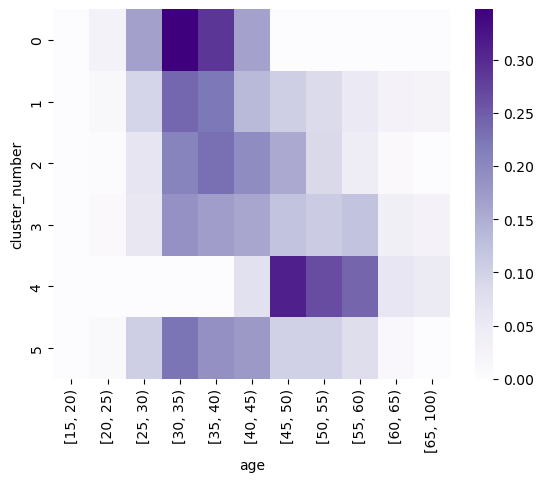

In [17]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1),cmap='Purples')

In [18]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3022,5426,702,413,4980,55,826,2496,814,4290,690,77
1,193,239,42,21,335,53,42,113,53,245,33,5
2,387,845,146,108,863,60,144,358,40,704,90,36
3,109,176,54,36,418,77,71,69,22,194,49,11
4,1414,2915,530,655,2733,2008,477,1077,3,2054,434,154
5,46,131,13,7,129,11,19,41,6,110,7,5


<Axes: xlabel='job', ylabel='cluster_number'>

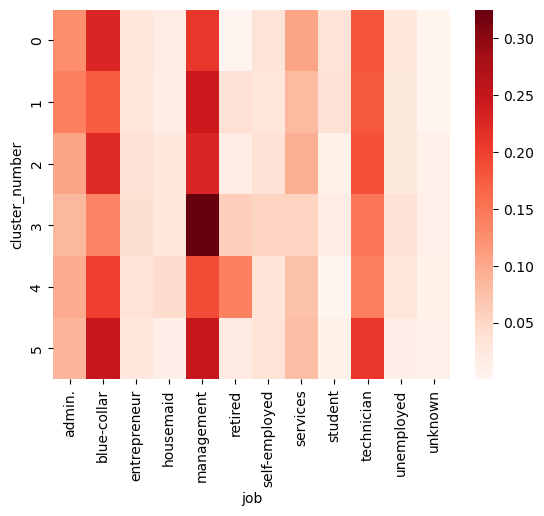

In [19]:
sns.heatmap(cross_cluster_job.apply(lambda x: x / x.sum(), axis=1), cmap='Reds')

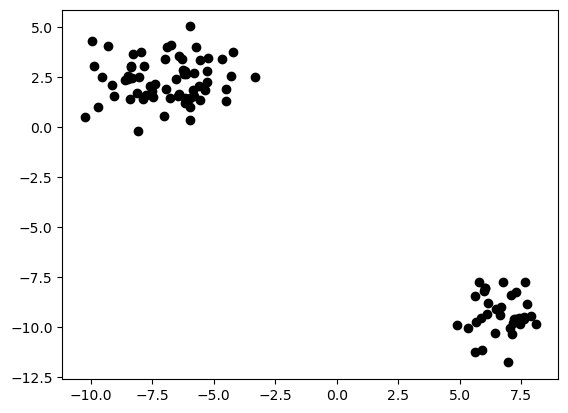

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=52)
plt.scatter(X[:,0], X[:,1], color='black')

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

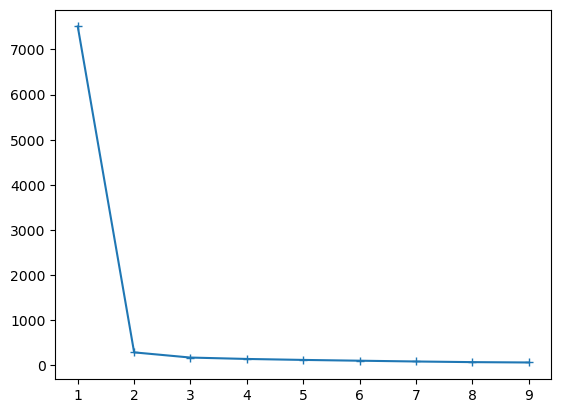

In [21]:
dist_list = []
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,10), dist_list, marker='+')

In [22]:
kmeans = KMeans(init='random', n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


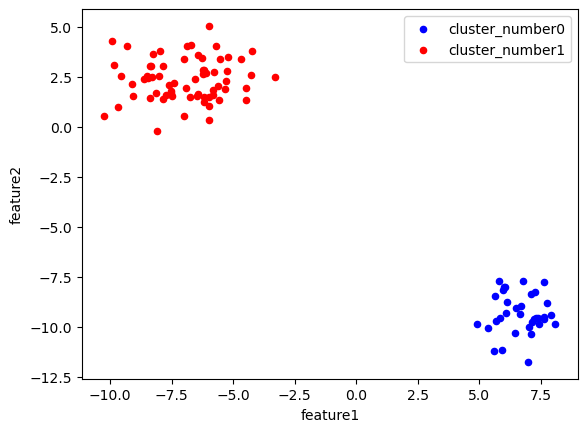

In [23]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis = 1)
merge_data.columns = ['feature1', 'feature2', 'cluster_number']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red']
for i, data in merge_data.groupby('cluster_number'):
    ax = data.plot.scatter(x = 'feature1', y = 'feature2', color=colors[i], label=f'cluster_number{i}', ax=ax)

相関関数0.889:


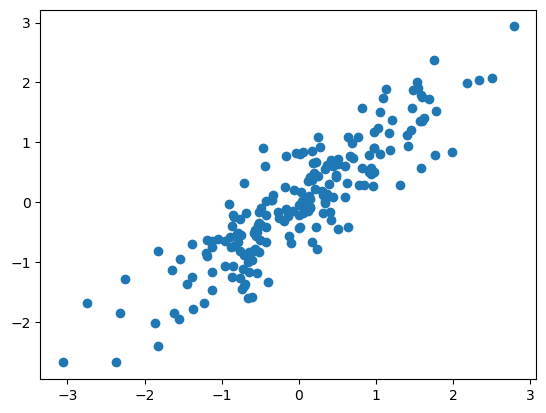

In [24]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを生成
sample = np.random.RandomState(1)

# 2つの乱数を生成
X = np.dot(sample.rand(2,2), sample.randn(2,200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関関数の算出とグラフ化
print('相関関数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [26]:
pca.components_

array([[-0.707, -0.707],
       [-0.707,  0.707]])

In [27]:
pca.explained_variance_

array([1.899, 0.111])

In [28]:
pca.explained_variance_ratio_

array([0.945, 0.055])

(-3.353, 3.079, -2.961, 3.216)

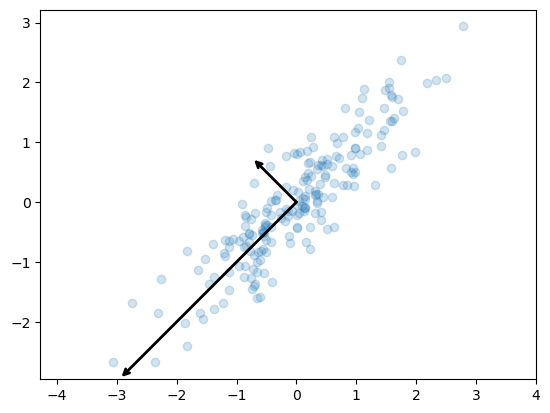

In [29]:
# パラメータ設定
arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)

# 矢印を書くための関数
def draw_vector(v0,v1):
    plt.gca().annotate('',v1,v0,arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の２軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

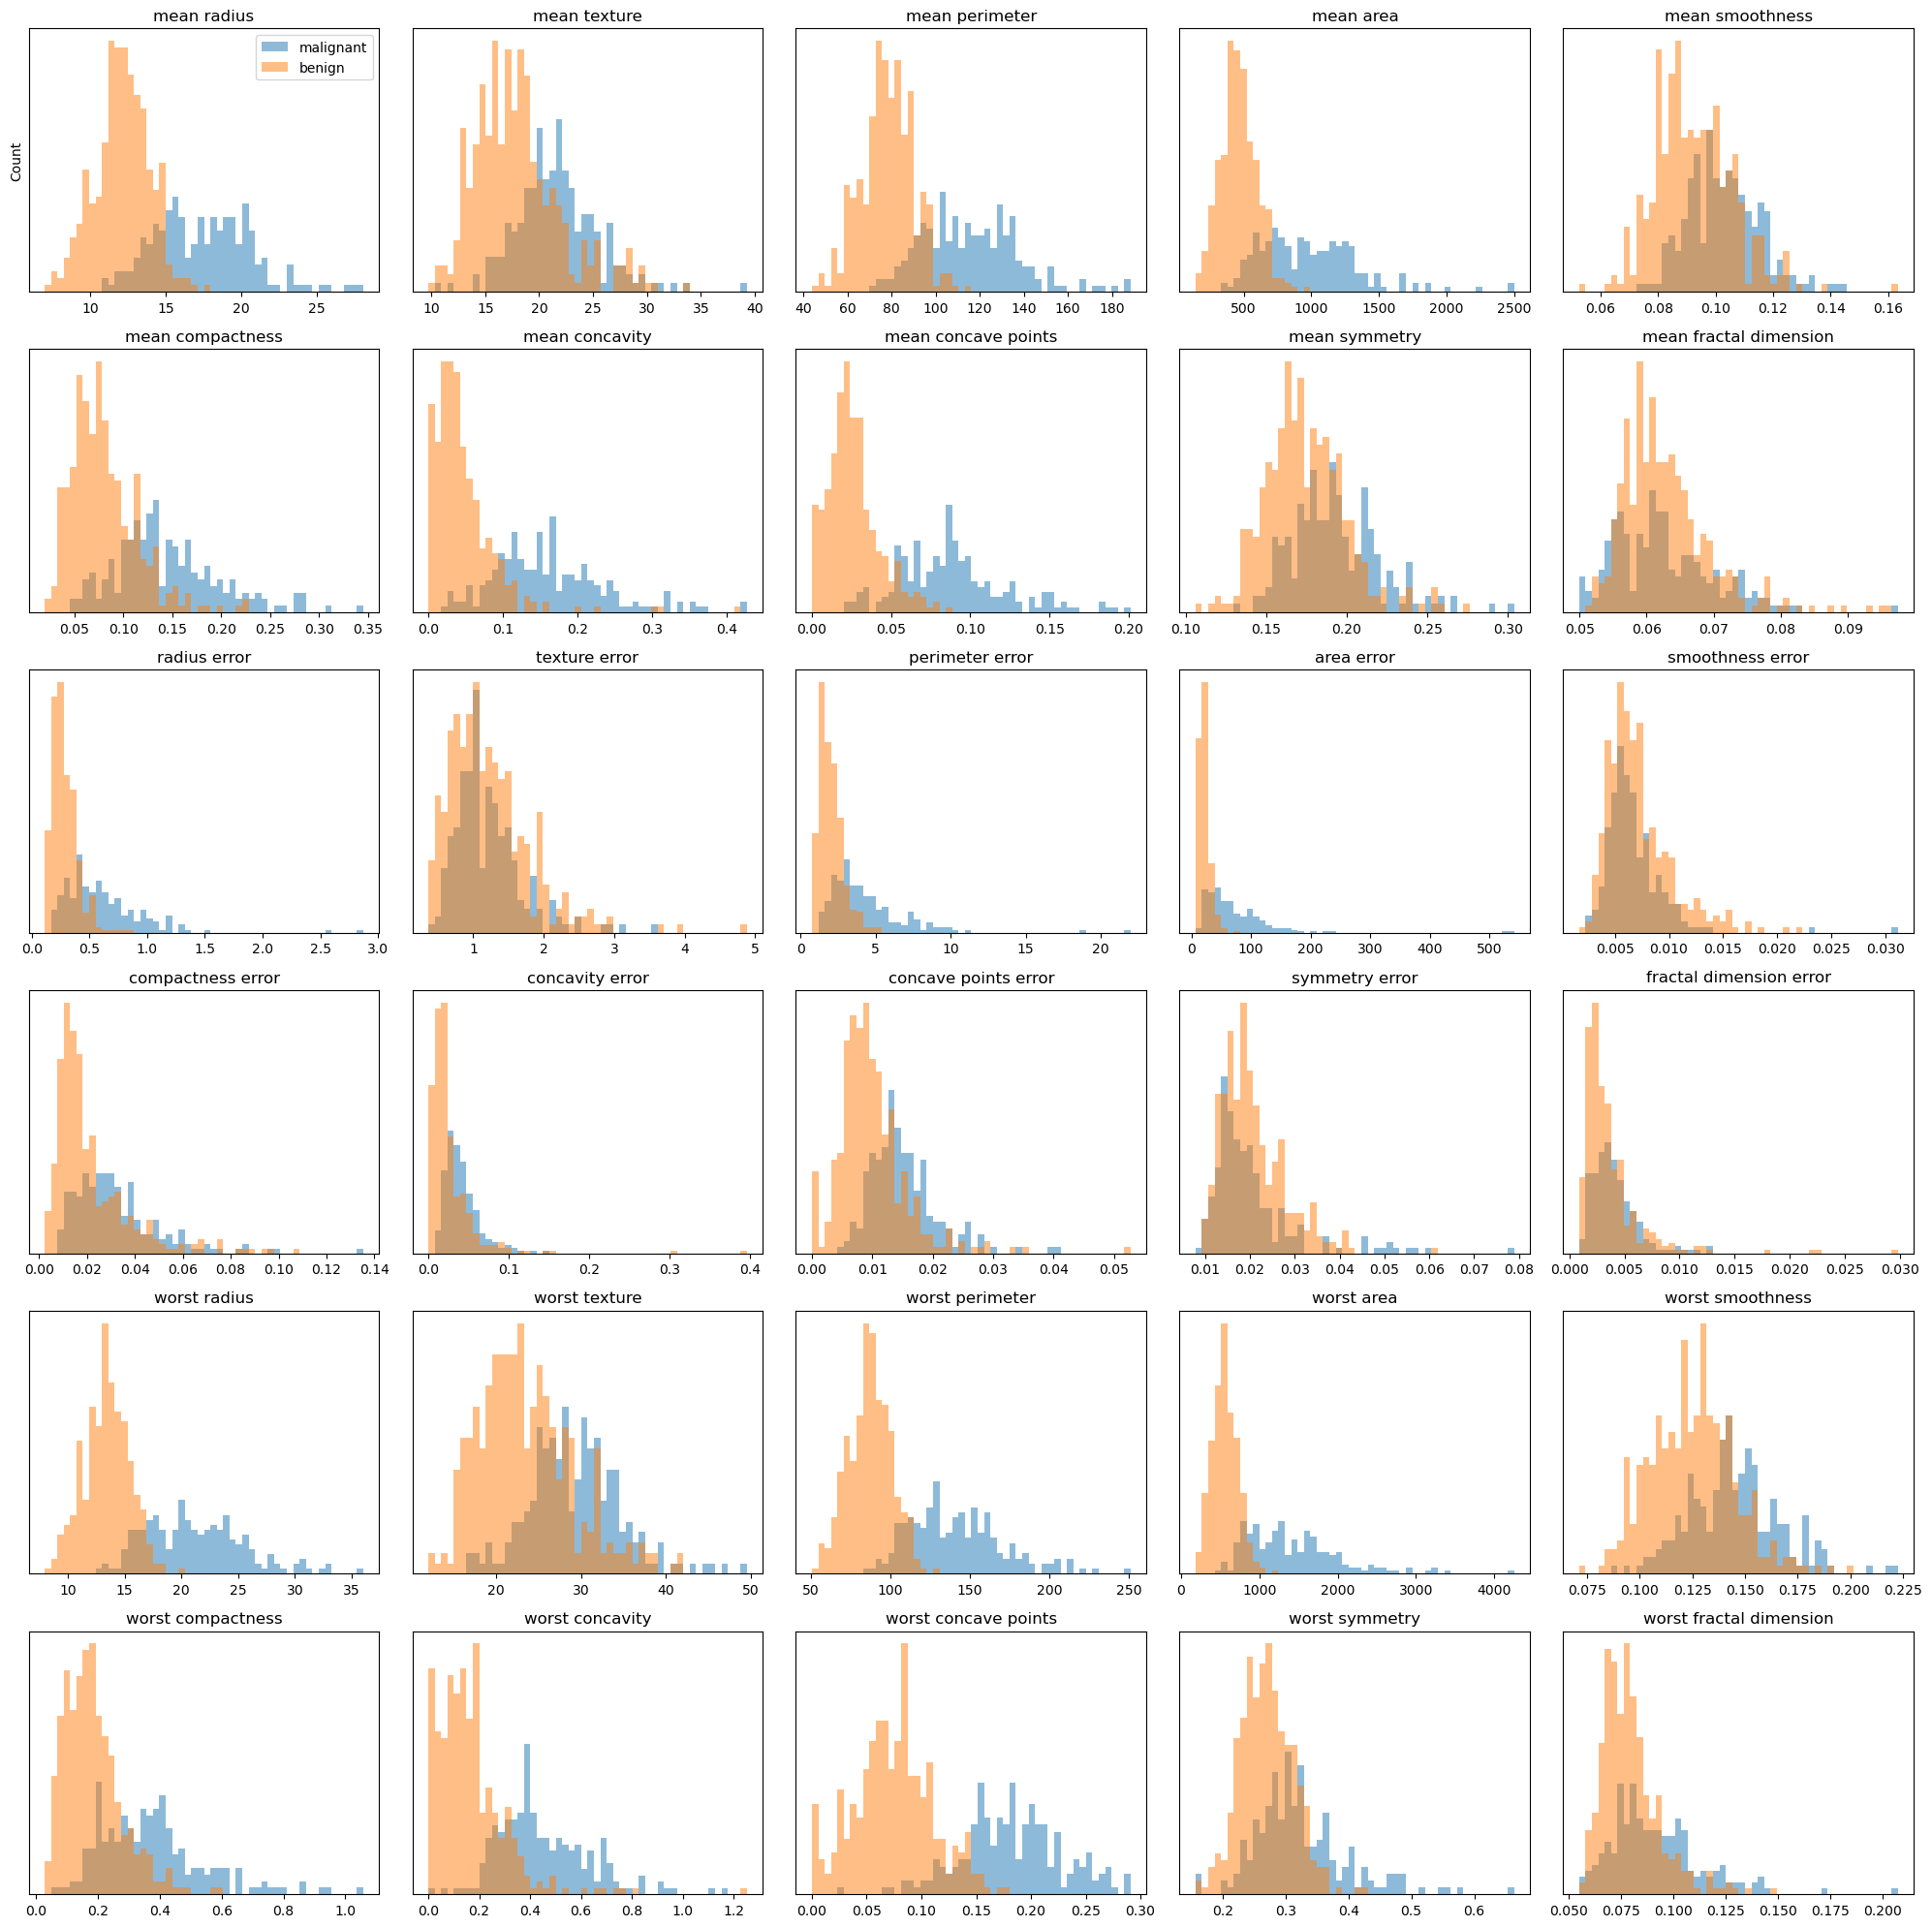

In [30]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データをmalignant(悪性)かbenign(良性)に分けるためのフィルター処理
# malignantはcancer.targetが0
malignant = cancer.data[cancer.target==0]
# benignはcancer.targetが1
benign = cancer.data[cancer.target==1]

# malignant(悪性)がブルー、benign(良性)がオレンジのヒストグラム
# 各図は、各々の説明変数(mean radiusなど)と目的変数との関係を示したヒストグラム
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [31]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [32]:
# 列にラベルを付ける、１つ目が第1成分、２つ目が第２成分
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

# 上のデータに、目的変数(cancer.target)を紐づける、横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]


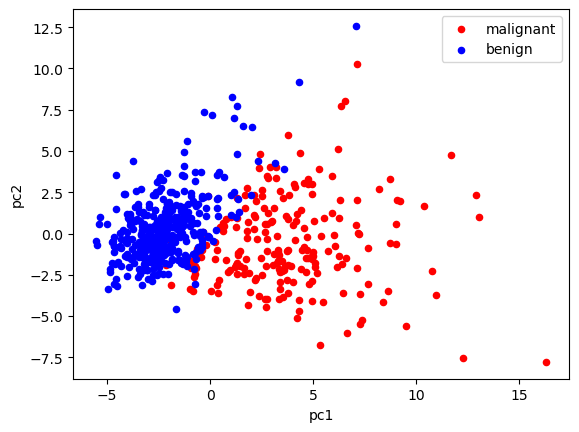

In [33]:
ax = pca_malignant.plot.scatter(x='pc1',y='pc2',color='red', label='malignant')
ax = pca_benign.plot.scatter(x='pc1',y='pc2',color='blue', label='benign', ax=ax)

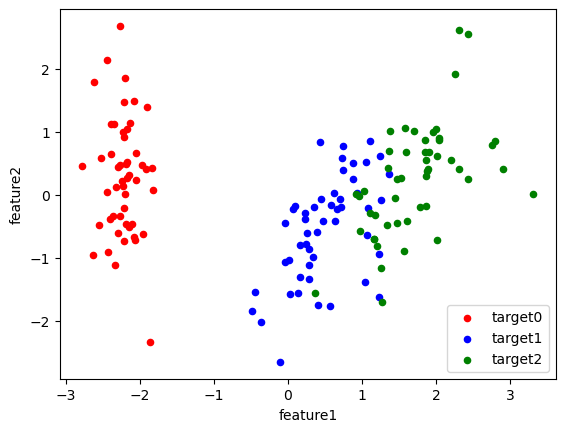

In [34]:
from sklearn.datasets import load_iris
iris= load_iris() 

sc = StandardScaler()
X_std = sc.fit_transform(iris.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

X_pca = pd.DataFrame(X_pca, columns=['feature1', 'feature2'])
X_pca = pd.concat([X_pca, pd.DataFrame(iris.target, columns=['target'])], axis=1)
ax = None
colors = ['red','blue','green']
for i, data in X_pca.groupby('target'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label= f'target{i}', ax=ax)
    



In [35]:
ls

 ドライブ C のボリューム ラベルは TIH0551600A です
 ボリューム シリアル番号は 820A-5C9D です

 C:\Users\User\DataScience のディレクトリ

2024/10/14  12:23    <DIR>          .
2024/10/10  13:33    <DIR>          ..
2024/10/11  19:54    <DIR>          .ipynb_checkpoints
2024/10/14  13:07           461,474 bank.csv
2024/10/14  13:07         4,610,348 bank-full.csv
2024/10/14  13:07             3,864 bank-names.txt
2024/10/06  16:30    <DIR>          Chap7
2024/10/14  11:14    <DIR>          Chap9
2024/09/23  18:07            23,190 Chapter1.ipynb
2024/09/25  14:47           434,481 Chapter2.ipynb
2024/09/26  11:10    <DIR>          Chapter3
2024/09/26  16:50           321,258 Chapter3.ipynb
2024/09/30  12:58           338,049 Chapter4.ipynb
2024/10/03  15:40           221,608 Chapter5.ipynb
2024/10/04  17:41           157,029 Chapter6.ipynb
2024/10/05  21:39           309,335 Chapter7
2024/10/08  16:18         4,823,728 Chapter7-2.ipynb
2024/10/11  19:53            82,303 Chapter8.ipynb
2024/10/14  12:23           723,871 Ch

In [36]:
cd Chap9/

C:\Users\User\DataScience\Chap9


In [37]:
ls

 ドライブ C のボリューム ラベルは TIH0551600A です
 ボリューム シリアル番号は 820A-5C9D です

 C:\Users\User\DataScience\Chap9 のディレクトリ

2024/10/14  11:14    <DIR>          .
2024/10/14  12:23    <DIR>          ..
2024/10/14  11:14        23,715,344 Online Retail.xlsx
               1 個のファイル          23,715,344 バイト
               2 個のディレクトリ  368,352,305,152 バイトの空き領域


In [38]:
trans = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
# InvoiceNoの先頭１文字ををcancel_flgとして追加
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x: str(x)[0])
trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [40]:
trans = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]

In [41]:
trans['StockCode'].value_counts().head()

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: count, dtype: int64

In [42]:
trans_all = set(trans.InvoiceNo)

# 商品85123Aを購入したデータをtrans_aとする
trans_a = set(trans[trans['StockCode']=='85123A'].InvoiceNo)
print(len(trans_a))

# 商品85099Bを購入したデータをtrans_bとする
trans_b = set(trans[trans['StockCode']=='85099B'].InvoiceNo)
print(len(trans_b))

# 商品85123A及び85099Bを購入したデータをtrans_abとする
trans_ab = trans_a & trans_b
print(len(trans_ab))

1978
1600
252


In [43]:
# trans_abの、両商品を含むバスケットの数を表示
print('両商品を含むバスケットの数:{}'.format(len(trans_ab)))
print('両商品を含むバスケットの全体に占める割合:{:.3f}'.format(len(trans_ab)/len(trans_all)))

両商品を含むバスケットの数:252
両商品を含むバスケットの全体に占める割合:0.014


In [44]:
# trans_aの、両商品を含むバスケットの数を表示
print('両商品を含むバスケットの数:{}'.format(len(trans_a)))
print('両商品を含むバスケットの全体に占める割合:{:.3f}'.format(len(trans_a)/len(trans_all)))

両商品を含むバスケットの数:1978
両商品を含むバスケットの全体に占める割合:0.107


In [45]:
print('確信度:{:3f}'.format(len(trans_ab)/len(trans_a)))

確信度:0.127401


In [46]:
print('確信度:{:3f}'.format(len(trans_ab)/len(trans_b)))

確信度:0.157500


In [47]:
# 全体のバスケットに占める商品Bの購買率を計算
support_b = len(trans_b) / len(trans_all)

# 商品Aを購買したときの商品Bの購買率を計算
confidence = len(trans_ab) / len(trans_a)

# リスト値を計算
lift = confidence / support_b
print('lift:{:3f}'.format(lift))

lift:1.475945


In [123]:
indexer = trans.StockCode.value_counts() > 1000
item = indexer[indexer ==True].index
item

Index(['85123A',    22423, '85099B',    84879,    47566,    20725,    22720,
          20727,   'POST',    23203,    22383,    21212,    22197,    23209,
          23298,    22086,    22382],
      dtype='object', name='StockCode')

In [147]:
import itertools
trans_all = set(trans.InvoiceNo)

results={}
for element in itertools.combinations(item,2):
    trans_0 = set(trans[trans['StockCode']==element[0]].InvoiceNo)
    trans_1 = set(trans[trans['StockCode']==element[1]].InvoiceNo)
    trans_both = trans_0 & trans_1
    support = len(trans_both) / len(trans_all)
    results[element] = support

maxKey = max([(v,k) for k,v in results.items()])
print('組み合わせ:{}'.format(maxKey[1]))
print('支持度の最大値:{:.4f}'.format(maxKey[0]))
trans_0

組み合わせ:(20725, 22383)
支持度の最大値:0.0280


{536371,
 536381,
 536402,
 536412,
 536415,
 536464,
 536531,
 536538,
 536569,
 536597,
 536633,
 536636,
 536667,
 536732,
 536742,
 536769,
 536795,
 536813,
 536859,
 536943,
 536946,
 536960,
 536975,
 536988,
 537038,
 537047,
 537049,
 537057,
 537126,
 537128,
 537131,
 537135,
 537138,
 537141,
 537144,
 537154,
 537160,
 537195,
 537219,
 537222,
 537224,
 537225,
 537257,
 537298,
 537334,
 537335,
 537359,
 537370,
 537375,
 537382,
 537384,
 537389,
 537391,
 537395,
 537397,
 537400,
 537418,
 537433,
 537441,
 537472,
 537484,
 537606,
 537608,
 537614,
 537627,
 537635,
 537646,
 537693,
 537762,
 537772,
 537781,
 537829,
 537830,
 537847,
 537889,
 538053,
 538069,
 538076,
 538079,
 538086,
 538107,
 538116,
 538167,
 538168,
 538170,
 538187,
 538201,
 538209,
 538240,
 538307,
 538312,
 538313,
 538327,
 538347,
 538361,
 538364,
 538371,
 538403,
 538418,
 538419,
 538421,
 538509,
 538510,
 538514,
 538518,
 538541,
 538567,
 538626,
 538637,
 538641,
 538659,
 

In [139]:
maxKey[1]

(20725, 22383)

In [151]:
trans_both

{536412,
 536769,
 537057,
 537135,
 537889,
 538641,
 558751,
 563555,
 563558,
 566345,
 566400,
 566669,
 566786,
 566976,
 566979,
 567481,
 567482,
 567662,
 567935,
 568146,
 568207,
 568792,
 569357,
 569412,
 569483,
 569555,
 569736,
 569824,
 570116,
 570423,
 570482,
 570488,
 570682,
 572098,
 572565,
 572651,
 573544,
 573576,
 573830,
 574328,
 574643,
 574678,
 575060,
 575117,
 575602,
 575668,
 575726,
 576228,
 576648,
 576864,
 577167,
 577317,
 577485,
 577490,
 577504,
 577601,
 577699,
 577782,
 578074,
 578233,
 578262,
 578814,
 578931,
 579093,
 579196,
 580075,
 580504,
 580673,
 580727,
 581147}

'%.3f'